https://zenn.dev/thimblee/articles/ml_prml_perceptron

# 第7章パーセプトロン型学習規則

- パーセプトロンを実装してみる
- 適当なデータを放り込んで、識別境界の変化を見る
- パラメータの初期値を0と乱数でやってみる

In [1]:
import os
import sys
from typing import List

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
sys.path.append("../src")
from model import Perceptron
from data import get_sample

In [3]:
# 特徴ベクトルの次元数
dim = 2
# サンプル数
n = 100

x, y = get_sample(dim, n)

print(x)
print(y)

# パーセプトロンのモデル定義
eta = 0.0001
model = Perceptron(dim=dim, eta=eta)

[[ 1.          0.64664438  0.08228992]
 [ 1.         -0.2314976   0.03301538]
 [ 1.          0.99267509  0.78483631]
 [ 1.         -0.05726312  0.26223724]
 [ 1.         -0.13977022 -0.09595515]
 [ 1.         -0.36208932 -0.00194521]
 [ 1.         -0.97286237 -0.6950457 ]
 [ 1.          0.43291197 -0.42601968]
 [ 1.          0.05188862 -0.12768146]
 [ 1.         -0.37936608 -0.95444988]
 [ 1.         -0.51683649 -0.41889749]
 [ 1.          0.98908173 -0.76884216]
 [ 1.          0.08807818 -0.01599852]
 [ 1.          0.13555155 -0.97501534]
 [ 1.          0.65298445  0.9628974 ]
 [ 1.         -0.1215454   0.14028578]
 [ 1.          0.40505417 -0.31094519]
 [ 1.         -0.12092585  0.84678408]
 [ 1.          0.71743724  0.57715573]
 [ 1.          0.11450467  0.7259687 ]
 [ 1.         -0.10248133 -0.45734419]
 [ 1.         -0.8283263   0.00769303]
 [ 1.         -0.30804435  0.370954  ]
 [ 1.          0.34270642  0.62309313]
 [ 1.          0.62446493 -0.29773906]
 [ 1.         -0.60591372

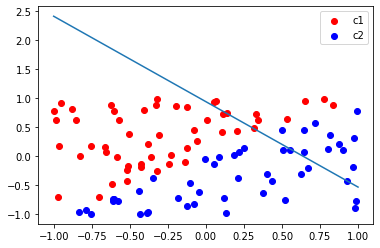

In [4]:
# サンプルを可視化してみる
# クラスで色分け
class1_cond = y >= 0
class2_cond = y < 0

plt.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
plt.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

# 初期パラメータの識別境界を可視化
xx = np.linspace(-1, 1, 20)
plt.plot(xx, (model.w[0] + model.w[1] * xx) / model.w[2] * -1)

plt.legend()
plt.show()


In [6]:
# 学習回数
n_iter = 10

accuracy_l = []
w_l = []

for i in range(n_iter):
    print(f"iter: {i + 1}")
    w_l.append(list(model.w))
    output = model.forward(x)
    accuracy = np.sum(output == y) / len(y)
    print(f"accuracy: {accuracy}")
    accuracy_l.append(accuracy)

    # パラメータ更新
    model.update_w(output, x, y)

iter: 1
accuracy: 0.47
iter: 2
accuracy: 0.54
iter: 3
accuracy: 0.73
iter: 4
accuracy: 0.81
iter: 5
accuracy: 0.91
iter: 6
accuracy: 0.98
iter: 7
accuracy: 0.99
iter: 8
accuracy: 1.0
iter: 9
accuracy: 1.0
iter: 10
accuracy: 1.0


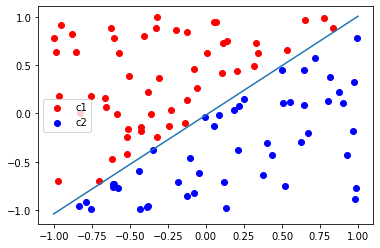

In [7]:
# 学習後の識別境界を可視化
plt.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
plt.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

xx = np.linspace(-1, 1, 20)
plt.plot(xx, (model.w[0] + model.w[1] * xx) / model.w[2] * -1)
plt.legend()
plt.show()

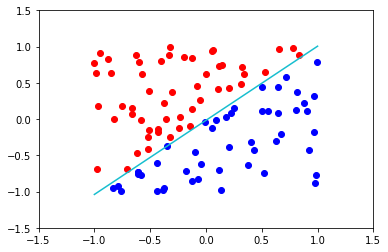

In [8]:
# パラメータの変化の様子

xx = np.linspace(-1, 1, 20)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

ax.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
ax.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

ims = []
for w in w_l:
    im = ax.plot(xx, (w[0] + w[1] * xx) / w[2] * -1)
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=100)

ani.save("../output/parceptron_params.gif", writer="pillow")


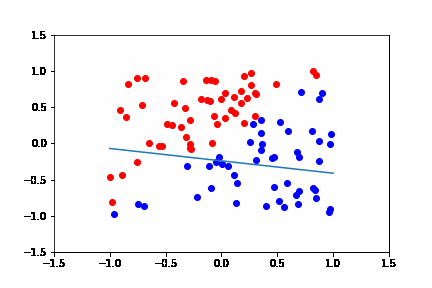